In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [ ]:
from zipfile import ZipFile
file = "/content/archive (1).zip"
with ZipFile(file,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# Load the dataset
data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.value_counts()

,,,,,count
CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),
1,Male,19,15,39,1
138,Male,32,73,73,1
128,Male,40,71,95,1
129,Male,59,71,11,1
130,Male,38,71,75,1
...,...,...,...,...,...
70,Female,32,48,47,1
71,Male,70,49,55,1
72,Female,47,49,42,1


male--> 0

female--> 1

In [ ]:
# Replace 'Male' with 0 and 'Female' with 1
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})

<ipython-input-12-beef7dc8adc4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})


In [ ]:
# Outlier detection and handling
z_scores = np.abs(zscore(data))
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]

In [ ]:
data.shape

(200, 5)

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
# Dimensionality Reduction (optional)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

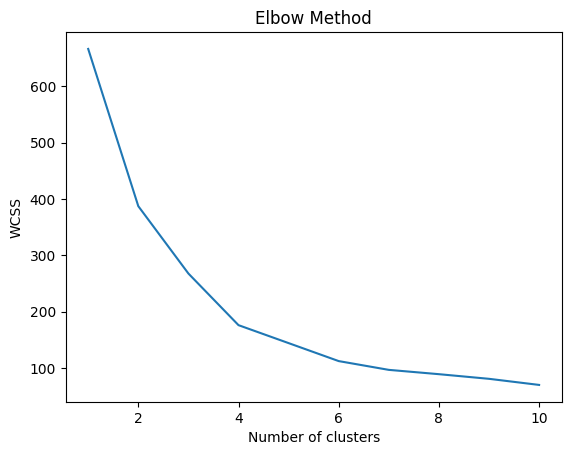

In [ ]:
# K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Choose the optimal number of clusters (e.g., based on the elbow point)
n_clusters = 4

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(data_pca)
data['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(data_pca)
data['gmm_cluster'] = gmm.predict(data_pca)

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_pca)
data['dbscan_cluster'] = dbscan.labels_

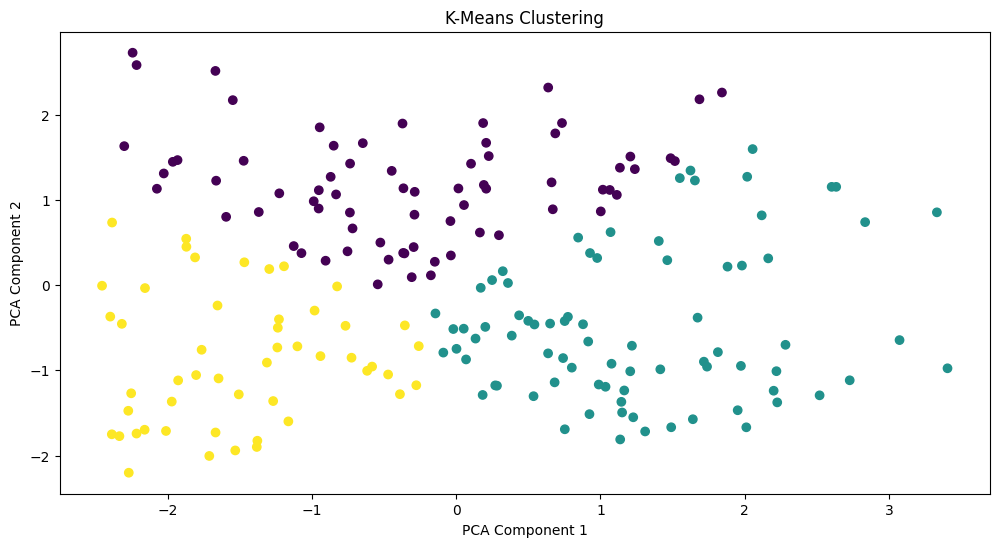

In [ ]:
# Visualizing the Clusters
plt.figure(figsize=(12, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['kmeans_cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

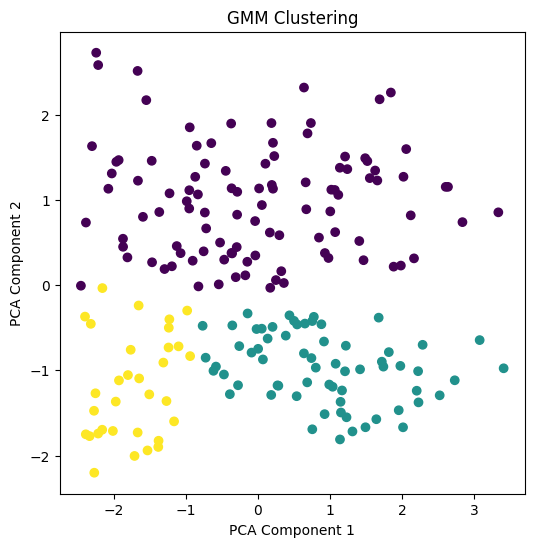

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['gmm_cluster'], cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


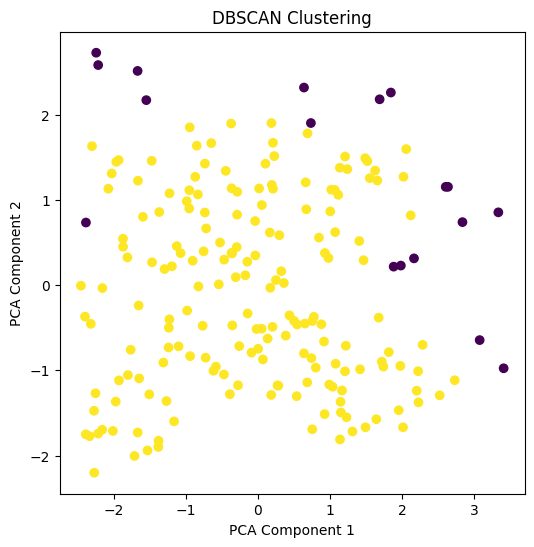

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [1]:
from zipfile import ZipFile
file = "/content/archive.zip"
with ZipFile(file,'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
# Load the dataset
data1 = pd.read_csv("/content/WineQT.csv")

In [6]:
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [9]:
data1.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [11]:
data1.shape

(1143, 13)

In [13]:
# Outlier detection and handling
z_scores = np.abs(zscore(data1))
threshold = 3
data1 = data1[(z_scores < threshold).all(axis=1)]

In [18]:
# Standardize the data
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)

In [17]:
data1.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [33]:
# Dimensionality Reduction (optional)
pca = PCA(n_components=2)
data1_pca = pca.fit_transform(data1_scaled)

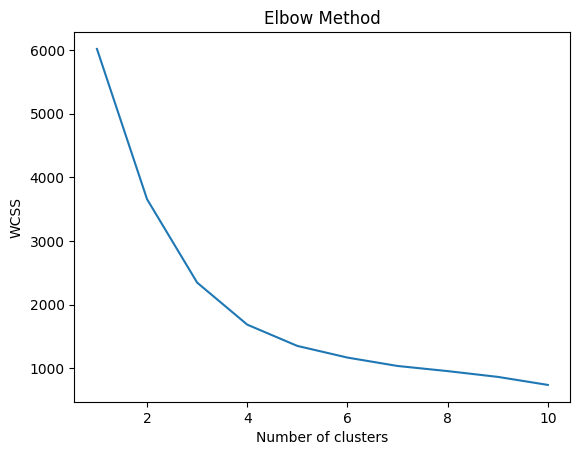

In [34]:
# K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data1_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# Choose the optimal number of clusters (e.g., based on the elbow point)
n_clusters = 4

In [36]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(data1_pca)
data1['kmeans_cluster'] = kmeans.labels_

In [37]:
# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(data_pca)
data1['gmm_cluster'] = gmm.predict(data1_pca)

In [38]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data1_pca)
data1['dbscan_cluster'] = dbscan.labels_

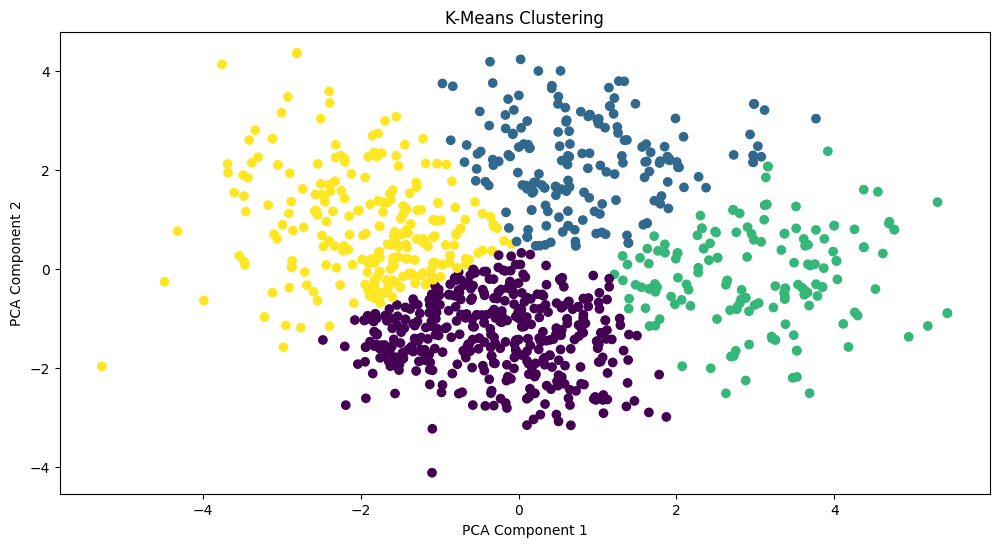

In [40]:
# Visualizing the Clusters
plt.figure(figsize=(12, 6))
plt.scatter(data1_pca[:, 0], data1_pca[:, 1], c=data1['kmeans_cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

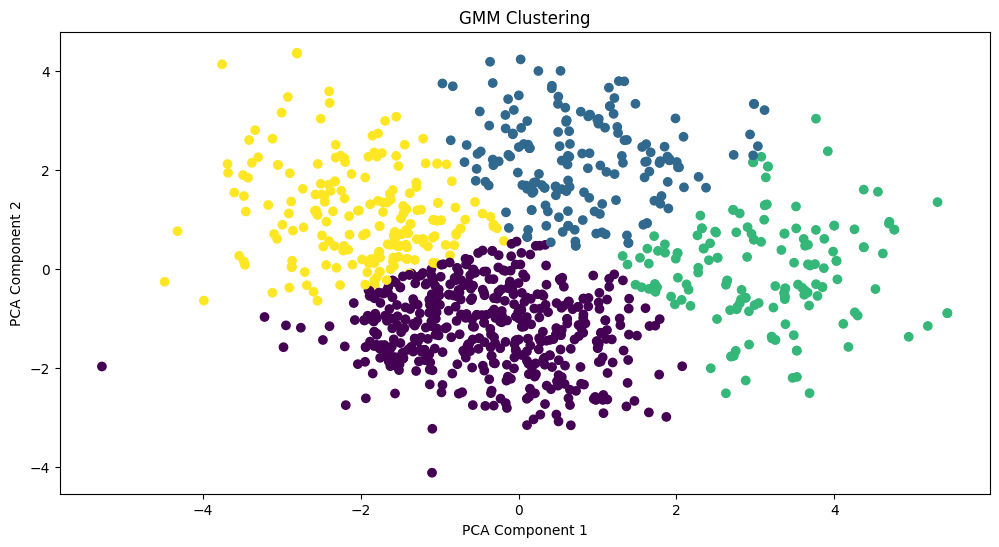

In [41]:
plt.figure(figsize=(12, 6))
plt.scatter(data1_pca[:, 0], data1_pca[:, 1], c=data1['gmm_cluster'], cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

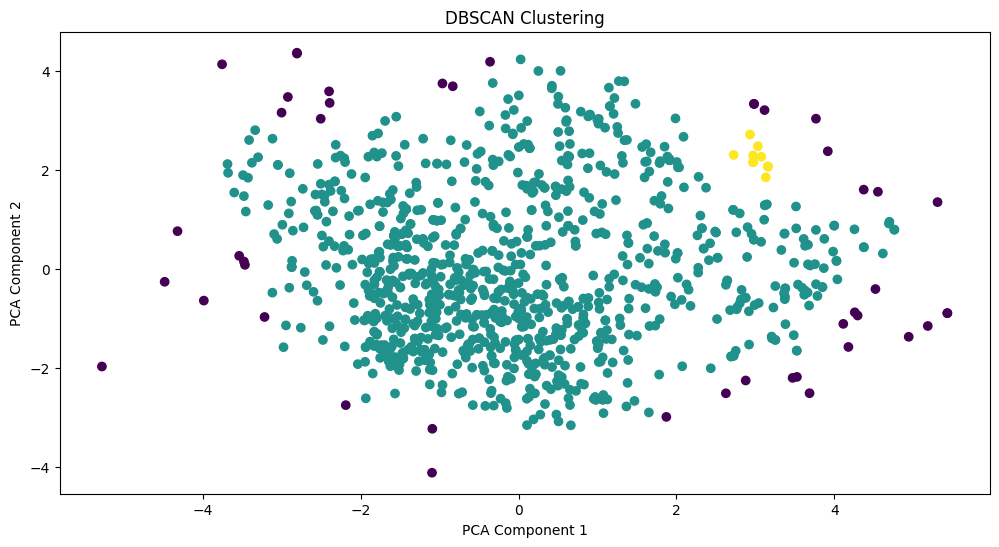

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(data1_pca[:, 0], data1_pca[:, 1], c=data1['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()